In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
np.seterr(all='ignore')
import skdsp.signal.discrete as ds

In [2]:
sgs = [ds.Delta(), ds.Step(), ds.Ramp()]
sgKeys = ['delta', 'escalón', 'rampa']
sgValues = [0, 1, 2]
sgButtons = widgets.ToggleButtons(
    options=list(zip(sgKeys, sgValues)),
    description='señal:',
    disabled=False,
    button_style='',
    tooltip='Description'
)
opKeys = ['sólo retardo', 'reflexión y retardo', 'retardo y reflexión']
opValues = [0, 1, 2]
opButtons = widgets.ToggleButtons(
    options=list(zip(opKeys, opValues)),
    description='señal:',
    disabled=False,
    button_style='',
    tooltip='Description'
)
opHbox = widgets.HBox([opButtons])

## 1.- Básicas

<IPython.core.display.Javascript object>


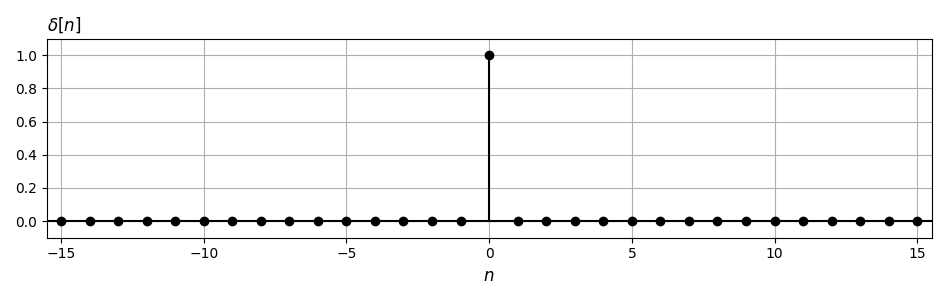

In [8]:
# señales básicas
npts = 16
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl = plt.stem(ns, sgs[0][ns], linefmt='k-', basefmt='k-', markerfmt='ok')
plt.axis([-npts+0.5, npts-0.5, -0.1, 1.1])
plt.grid(True)
plt.xlabel('$n$', size=12)
def s1(sg=sgs[0], fd=0, delay=0):
    s = sgs[sg]
    if fd == 0:
        s = s.delay(delay)
    elif fd == 1:
        s = s.flip().delay(delay)
    elif fd == 2:
        s = s.delay(delay).flip()
    ys = s[ns]
    pl[0].set_ydata(ys)
    for k in range(len(ns)):
        pl[1][k].set_ydata([0, ys[k]])
    min_ = min(0, np.min(ys))
    max_ = max(np.max(ys), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.title(s.latex_yexpr(mode='inline'), loc='left')
widgets.interact(s1, sg=sgButtons, fd=opButtons, delay=(-15, 15));

## 2.- Partes par e impar

In [ ]:
plt.rcParams['text.usetex'] = True
def s2(sg='delta', width=16, delay=0):
    npts = 15
    if sg == 'delta':
        s = ds.Delta()
    elif sg == 'step':
        s = ds.Step()
    elif sg == 'ramp':
        s = ds.Ramp()
    elif sg == 'rect':
        s = ds.Rect(width)
    elif sg == 'triang':
        s = ds.Triang(width)
    elif sg == 'sin':
        s = ds.Sine(width)
    elif sg == 'cos':
        s = ds.Cosine(width)
    s = s.delay(delay)
    ns = np.arange(-npts, npts+1)
    ys = s[ns]
    se = s.even
    ye = se[ns]
    so = s.odd
    yo = so[ns]
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    ml = plt.stem(ns, ys, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.xlim([-npts-0.5, npts+0.5])
    min_ = min(0, np.min(ys))
    max_ = max(np.max(ys), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(r'$x[n]={0}$'.format(pt.latex(s)), size=24)
    plt.grid(True)
    plt.subplot(132)
    ml = plt.stem(ns, ye, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.xlim([-npts-0.5, npts+0.5])
    min_ = min(0, np.min(ye))
    max_ = max(np.max(ye), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(r'$x_e[n]$', size=24)
    plt.grid(True)
    plt.subplot(133)
    ml = plt.stem(ns, yo, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.xlim([-npts-0.5, npts+0.5])
    min_ = min(0, np.min(yo))
    max_ = max(np.max(yo), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(r'$x_o[n]$', size=24)
    plt.grid(True)

In [ ]:
interact(s2, sg=('delta', 'step', 'ramp', 'rect', 'triang', 'sin', 'cos'),
         part=('none', 'even', 'odd'),
         width=(1, 30, 2), delay=(-15, 15));